In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
import statsmodels.api as sm
import numpy as np

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fitted_pdf = pd.read_csv('fitted_pdfs.csv',index_col=0)
fitted_pdf.head()

,alpha,anglit,arcsine,argus,beta,betaprime,bradford,burr,burr12,cauchy,...,truncexpon,truncnorm,tukeylambda,uniform,vonmises,vonmises_line,wald,weibull_max,weibull_min,wrapcauchy
-0.129558,3.206550e-07,0.0,21.070479,0.096040,0.000459,0.000009,6.770152,0.014859,0.008476,0.239816,...,6.448061,0.0,0.008556,4.66913,1.481092e+29,0.0,0.000003,8.007570e-07,0.000593,4.531694
-0.127416,6.293157e-07,0.0,12.226638,0.235411,0.000610,0.000014,6.701026,0.016926,0.009791,0.247673,...,6.403550,0.0,0.009714,4.66913,1.335322e+28,0.0,0.000633,1.577787e-06,0.000946,4.531694
-0.125275,1.214970e-06,0.0,9.519154,0.374711,0.000809,0.000023,6.633297,0.019280,0.011308,0.255921,...,6.359347,0.0,0.011035,4.66913,3.420229e+28,0.0,0.010014,3.051605e-06,0.001460,4.531694
-0.123133,2.307951e-06,0.0,8.086727,0.513900,0.001069,0.000036,6.566924,0.021959,0.013062,0.264586,...,6.315449,0.0,0.012544,4.66913,1.607060e+29,0.0,0.053900,5.795190e-06,0.002191,4.531694
-0.120991,4.314675e-06,0.0,7.169063,0.652935,0.001410,0.000057,6.501865,0.025008,0.015086,0.273698,...,6.271854,0.0,0.014266,4.66913,1.070638e+28,0.0,0.164618,1.080919e-05,0.003205,4.531694


In [3]:
fitted_dist = pd.read_csv('fitted_distributions_best.csv', index_col=0)
fitted_dist['params'] = [eval(i) for i in fitted_dist['params']]
fitted_dist['l'] = [len(i) for i in fitted_dist['params']]
fitted_dist.head(20)

,distributions,SSE,AIC,BIC,params,l
0,genhyperbolic,253.766426,-0.005131,-880.853538,"(1.8895152570008256, 0.9744888418191312, -0.17...",5
1,mielke,254.286030,-5.107306,-885.903359,"(113.66376381867467, 178.03637652198557, -1.95...",4
2,johnsonsu,254.489831,-12.242223,-885.264046,"(0.45292121416598957, 1.8073562476394767, 0.01...",4
3,nct,254.492364,-12.172199,-885.256102,"(6.080773005016582, -0.6998121355455837, 0.016...",4
4,burr,254.760149,-5.415069,-884.416863,"(316.6117715992358, 0.6500750316125852, -3.495...",4
5,genlogistic,255.191801,-7.938155,-889.748026,"(0.6656231286676977, 0.008975804919760192, 0.0...",3
6,norminvgauss,257.047729,-10.996048,-877.283323,"(1.9393724002701813, -0.4573517172724848, 0.00...",4
7,burr12,257.198275,17.744374,-876.816092,"(6123126.734354196, 1.4952441410926172, -90962...",4
8,crystalball,277.539911,3.561114,-816.074358,"(1.40707753466191, 19.495100631017365, 0.00268...",4
9,t,296.106276,9.318657,-771.083027,"(6.080803251126445, 0.0015888318874874476, 0.0...",3


In [4]:
data = pd.read_csv(".\\data\\ropa.csv", index_col='Date', header=0)
data['returns'] = data.interpolate(type='linear').pct_change()
data.index = pd.to_datetime(data.index)

rtrs = list(data['returns'])
rtrs = rtrs[1:]

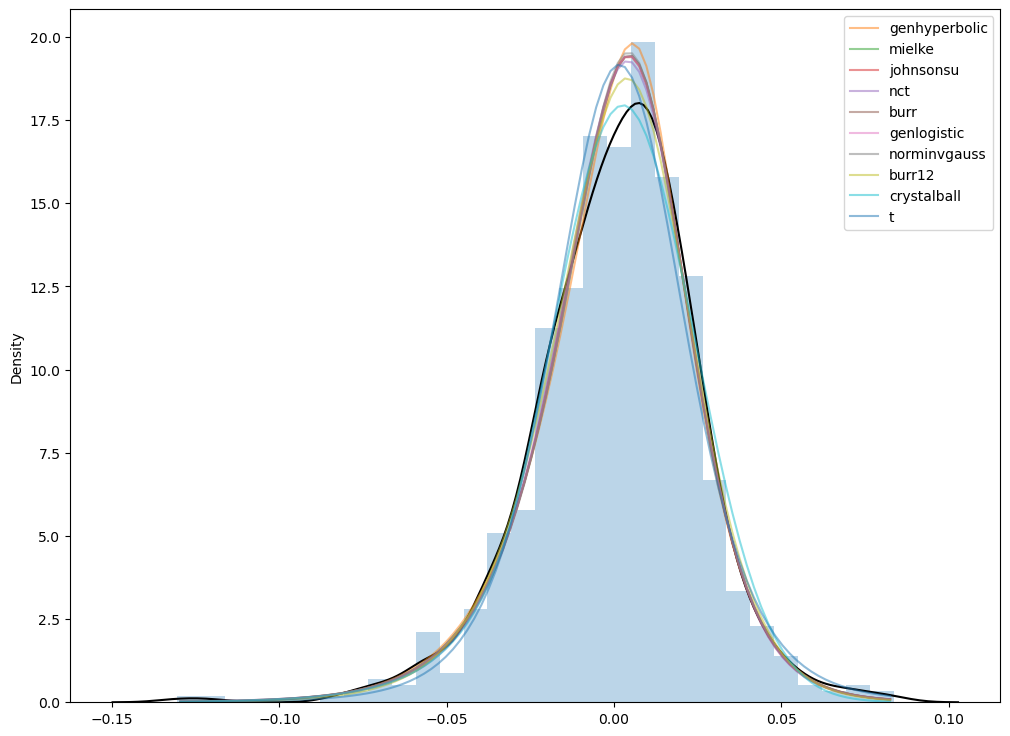

In [5]:
x = fitted_pdf.index
types = fitted_dist['distributions'][:10]
plt.figure(figsize=(12,9))
plt.hist(rtrs, bins=30, alpha=0.3, density=True)
sns.kdeplot(rtrs, color='k')
for i in range(10):
    t = types[i]
    plt.plot(x,fitted_pdf[t], alpha=0.5, label=t)
plt.legend()
plt.savefig('images/porownanie.pdf')

In [6]:
def compare_dist(x, distribution):
    res = st.ecdf(x)
    xs = res.cdf.quantiles
    empirical = res.cdf.probabilities
    ft = [distribution.cdf(i) for i in xs]
    return (xs, empirical, ft)

In [7]:
def sq_error(ft, rl):
    n = len(ft)
    s = [(ft[i] - rl[i])**2  for i in range(n)]
    return(sum(s))

In [8]:
def fit_distributions_window(data, window = 500,distribution=st.t):
    T = len(data)

    # whole data fit
    a = distribution.fit(data)
    rozklad = distribution(*a)
    res = st.ecdf(rtrs)
    xs1 = res.cdf.quantiles
    ys1 = [rozklad.cdf(i) for i in xs1]
    empirical = res.cdf.probabilities
    print("Całośćiowy sse: ", sq_error(empirical, ys1))

    param_df = pd.DataFrame(columns = ('t_min', 't_max', 'params', 'SSE', 'ecdf_quantiles'))

    param_df.loc[-1] = (0, T, a ,sq_error(empirical, ys1), xs1)

    for i in range(T - window):

        t_min = i
        t_max = i + window
        
        W = data[t_min:t_max]

        p = distribution.fit(W)

        dst = distribution(*p)
        xs, ecdf, ft = compare_dist(W, dst)

        if i%50 == 0:
            print(i)
            #plt.plot(xs, ecdf)
            #plt.plot(xs, ft)
            #plt.title(i)
            #plt.plot(xs1, real, alpha = 0.4)
            #plt.show()

        param_df.loc[i] = (t_min, t_max-1, p,sq_error(ecdf, ft), list(xs))
    return(param_df)


In [9]:
results = fit_distributions_window(rtrs)
results.to_csv('./data_distfit/fitted_t.csv')
results

AttributeError: module 'scipy.stats' has no attribute 'ecdf'

In [ ]:
results = fit_distributions_window(rtrs, distribution=st.crystalball)
results.to_csv('./data_distfit/fitted_crystalball.csv')
results

Całośćiowy sse:  0.0872089869978157
0
50
100
150


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:11024: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:11024: RuntimeWarning: invalid value encountered in multiply
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *


200
250


,t_min,t_max,params,SSE,ecdf_quantiles
-1,0,798,"(1.407077598616569, 19.495125290040754, 0.0026...",0.087209,"[-0.1306288805140844, -0.12126111859385258, -0..."
0,0,499,"(1.3527192149920586, 17.537592252813788, 0.003...",0.085267,"[-0.1306288805140844, -0.12126111859385258, -0..."
1,1,500,"(1.3410638096254048, 18.279119546178187, 0.003...",0.091285,"[-0.1306288805140844, -0.12126111859385258, -0..."
2,2,501,"(1.3477970086640707, 17.743752375379074, 0.003...",0.091226,"[-0.1306288805140844, -0.12126111859385258, -0..."
3,3,502,"(1.3414253591144032, 17.895810445499826, 0.003...",0.094191,"[-0.1306288805140844, -0.12126111859385258, -0..."
...,...,...,...,...,...
293,293,792,"(1.4097301702355343, 61218.06593127873, 0.0013...",NaN,"[-0.08235728377794271, -0.07925833692240081, -..."
294,294,793,"(1.407248309104068, 37253.81493527506, 0.00131...",NaN,"[-0.08235728377794271, -0.07925833692240081, -..."
295,295,794,"(1.4021927300402193, 675317.7023600887, 0.0013...",NaN,"[-0.08235728377794271, -0.07925833692240081, -..."
296,296,795,"(1.4020098674056056, 931736.2811250295, 0.0013...",NaN,"[-0.08235728377794271, -0.07925833692240081, -..."


In [ ]:
d = scipy.stats.t(*eval(df['params'][0]))
d


results['ecdf_quantiles'][1]

[-0.1306288805140844,
 -0.12126111859385258,
 -0.08235728377794271,
 -0.07925833692240081,
 -0.07505917801000395,
 -0.07120740840208939,
 -0.06993137578249586,
 -0.06971029266933082,
 -0.06828811148376046,
 -0.06378021122779354,
 -0.061575970146321324,
 -0.060854518624946285,
 -0.05780663668688446,
 -0.05779389339573937,
 -0.0568930425384675,
 -0.056859978915542286,
 -0.05619846782061888,
 -0.05535514512246875,
 -0.05389559410354117,
 -0.05316526648980113,
 -0.05221330351798914,
 -0.0479619065625867,
 -0.04615021751664128,
 -0.04556548742549782,
 -0.042824434763252484,
 -0.04149017869950289,
 -0.040403023960848494,
 -0.040307266362120786,
 -0.03982201418928444,
 -0.0392772974528901,
 -0.03820077706346103,
 -0.03813457018932975,
 -0.03718338011501676,
 -0.03711539981321654,
 -0.03683082626794387,
 -0.036618661757760074,
 -0.036375861028019485,
 -0.036348503380355335,
 -0.035512250389282185,
 -0.03483686851091139,
 -0.03473467142188813,
 -0.034641791746627515,
 -0.03458409708877341,
 -0.